# Linear Equations

Through the tf.solve function, TensorFlow can solve series of Linear Equations.

3x+2y	=15	
4x−y	=10

These types of linear equations are used for a number of problems in mathematics, from optimising factory output to geometry. You can solve these equations using a number of methods, but in this lesson, we will see how to use tf.solve to do this for us.

We’ll focus on the geometry. Here are two points, p1 and p2 that lie on a 2-Dimensional (x, y) space:

p1	=(1,2)	
p2	=(0,−1)

Here is where they sit on a plot:

<img src="scatter.png">

To do this in TensorFlow, we first setup a series of linear equations with our points at the center. First, we create our matrix of points. The first row corresponds to the first point, and the second row to the second point. Likewise, the first column is the x values, while the second column is the y values.

In [1]:
import tensorflow as tf

# Point 1
x1 = tf.constant(2, dtype=tf.float32)
y1 = tf.constant(9, dtype=tf.float32)
point1 = tf.stack([x1, y1])

In [2]:
# Point 2
x2 = tf.constant(-1, dtype=tf.float32)
y2 = tf.constant(3, dtype=tf.float32)
point2 = tf.stack([x2, y2])

In [3]:
# Combine points into an array
X = tf.transpose(tf.stack([point1, point2]))

The equation for a line is:

y = mx+b

Rearranging equation (5) to get x and y on the same side, we get the following:

y−ax	=b	

1/b*y−
a/
b*
 
x	=1

Our job is to find the values for a and b in the above equation, given our observed points. We can do this quite easily by taking the inverse of the points array and multiplying it by a matrix with ones.

Using matrices (because we are using TensorFlow), if X is our matrix of observed points and A is the parameters we need to learn, we setup a system:

AX=B

The parameters to learn is then simply:
    
A=BX−1

The matrix B is simple the number one - broadcasted appropriately - it originates from the right hand side of the equation above.

The matrix A is our parameters in equation 3 above.

In [12]:
B = tf.ones((1, 2), dtype=tf.float32)

parameters = tf.matmul(B, tf.matrix_inverse(X))

with tf.Session() as session:
    A = session.run(parameters)

There is a final step to find our a and b values from equation (5) above, which is to convert from these parameters (that fit equation (7) ).

In [13]:
b = 1 / A[0][1]
a = -b * A[0][0]
print("Equation: y = {a}x + {b}".format(a=a, b=b))

Equation: y = 2.0x + 5.000000298023242


# Tensorflow in 3D

TensorFlow is not just a deep learning library - it is a library for performing manipulations on numbers, and as such it can perform tasks that many other libraries can. In this lesson, we take a look at using TensorFlow to perform manipulations on 3D objects.

A 3D object can be modelled as a series of triangles in three-dimensional space, that we normally refer to as (x, y, z). These names are not required, but are commonly used. A triangle is created from three of these 3D points. A point itself can be represented as a vector with size (3,). An array of these is a matrix of size (n, 3), where n is the number of points we have. Let’s dive in and see a basic cube. We will need this functionality later, so let’s create a function that plots out a basic shape:

In [20]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

def plot_basic_object(points):
    """Plots a basic object, assuming its convex and not too complex"""
    tri = Delaunay(points).convex_hull
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    S = ax.plot_trisurf(points[:,0], points[:,1], points[:,2],
                        triangles=tri,
                        shade=True, cmap=cm.Blues,lw=0.5)
    ax.set_xlim3d(-5, 5)
    ax.set_ylim3d(-5, 5)
    ax.set_zlim3d(-5, 5)

    plt.show()

  

Now let’s create a shape. The function below will return the six points that make up a cube. If you go back to the previous function, you will see the Delaunay line, which turns these points into triangles, so that we may render them.

In [21]:
import numpy as np
def create_cube(bottom_lower=(0, 0, 0), side_length=5):
    """Creates a cube starting from the given bottom-lower point (lowest x, y, z values)"""
    bottom_lower = np.array(bottom_lower)
    points = np.vstack([
        bottom_lower,
        bottom_lower + [0, side_length, 0],
        bottom_lower + [side_length, side_length, 0],
        bottom_lower + [side_length, 0, 0],
        bottom_lower + [0, 0, side_length],
        bottom_lower + [0, side_length, side_length],
        bottom_lower + [side_length, side_length, side_length],
        bottom_lower + [side_length, 0, side_length],
        bottom_lower,
    ])
    return points

Now let’s put those pieces together and see what it looks like:

<IPython.core.display.Javascript object>


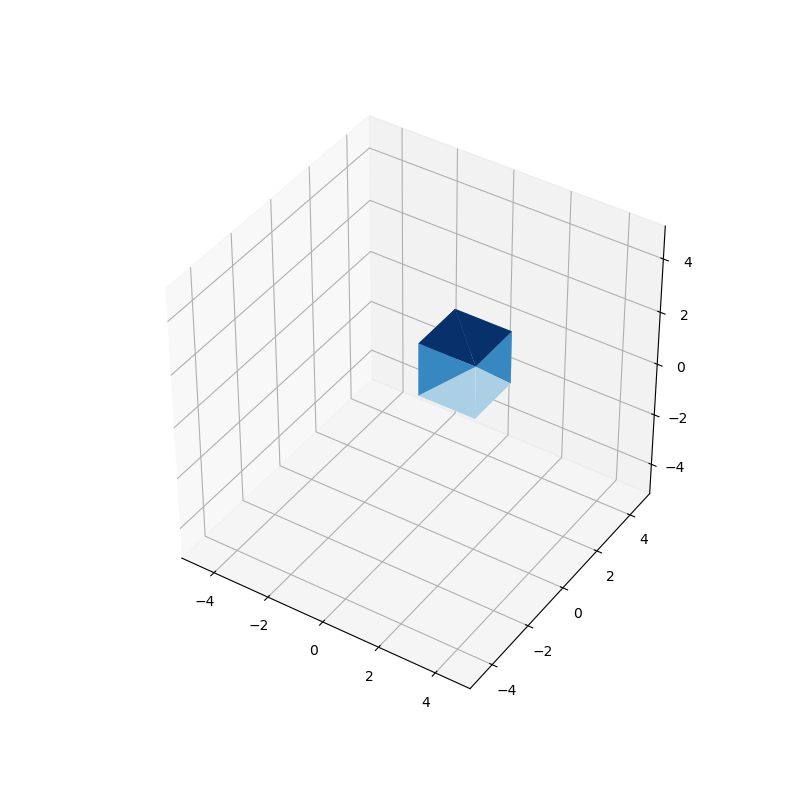

In [22]:
cube_1 = create_cube(side_length=2)

plot_basic_object(cube_1)

# Translation

A translation is a simple move: up/down, left/right, forward/backwards, or some combination of these. It is created by simply adding a vector to each point. If you add the same vector to all points, then the whole object will move in unison. Check out our lesson on broadcasting to understand what happens when we add our translation vector with size (3,) to our points matrix of size (n, 3).

<IPython.core.display.Javascript object>


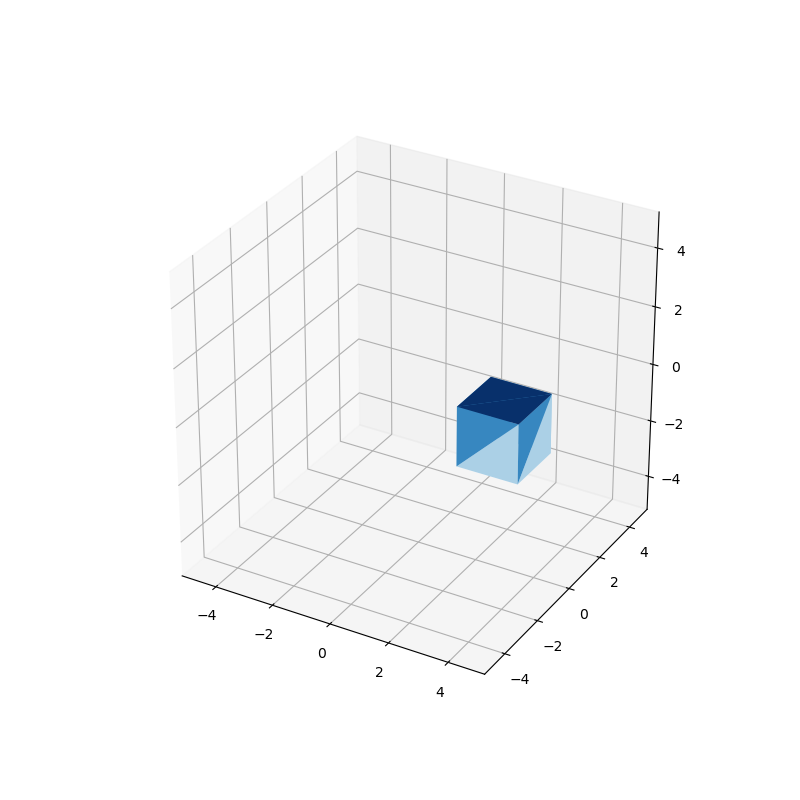

In [23]:
import tensorflow as tf

def translate(points, amount):
    return tf.add(points, amount)


points = tf.constant(cube_1, dtype=tf.float32)

# Update the values here to move the cube around.
translation_amount = tf.constant([3, -3, 0], dtype=tf.float32)


translate_op = translate(points, translation_amount)

with tf.Session() as session:
    translated_cube = session.run(translate_op)


plot_basic_object(translated_cube)

# Rotation

A rotation is formed by creating the dot product or a rotating matrix and the original points. Rotating an object first requires us to determine which axis you are rotating over. To rotate around a particular axis, set that axis’ value to zeros, with a 1 in the related axis. There are three matrices you need:

# Rotating around the x-axis

# Rotating around the y-axis

# Rotating around the z-axis

In the above, theta is the number of degrees to rotate the object. we take a point,we compute the dot product with one of these matrices, and then the point is rotated around the relevant axis. We can also compute the dot product of one of these (3, 3) matrices against our (n, 3) points matrix. However, for a dot product to work, we need to have the inner dimensions matrix (and n is not necessarily 3). Therefore, we need to put the points matrix first - then it becomes a dot product of a (n, 3) matrix with a (3, 3) matrix.

<IPython.core.display.Javascript object>


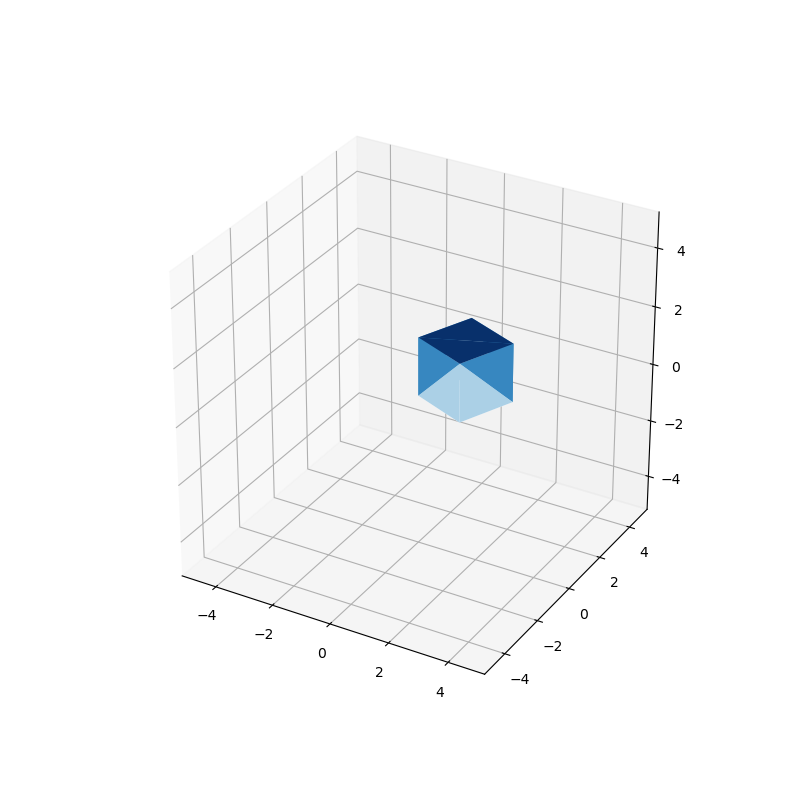

In [25]:
def rotate_around_z(points, theta):
    theta = float(theta)
    rotation_matrix = tf.stack([[tf.cos(theta), tf.sin(theta), 0],
                                   [-tf.sin(theta), tf.cos(theta), 0],
                                   [0, 0, 1]])
    return tf.matmul(tf.to_float(points), tf.to_float(rotation_matrix))


with tf.Session() as session:
    result = session.run(rotate_around_z(cube_1, 75))


plot_basic_object(result)

With simple matrix manipulations like these, but combined and at scale, we can create a whole range of transformations to 3D objects like this. Shearing, scaling, intersections and more are possible using this concept.